First importing packages and data, as well as the gaussian we'll use to fit the peaks

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.signal
import scipy.stats
import matplotlib.pyplot as plt
# %matplotlib qt
import mplhep
import pandas as pd

na_df = pd.read_csv('22Na.csv', skiprows=21)
co_df = pd.read_csv('60Co.csv', skiprows=21)
cs_df = pd.read_csv('137Cs.csv', skiprows=21)
bkg_df = pd.read_csv('bkg.csv', skiprows=21)

channels = na_df['Channel'].to_numpy()      # Only need this once as they're the same for each
na_counts = na_df['Counts'].to_numpy()
co_counts = co_df['Counts'].to_numpy()
cs_counts = cs_df['Counts'].to_numpy()
bkg_counts = bkg_df['Counts'].to_numpy()

calibrationVals = [2.27306926, 56.76252822]
channels_calib = (channels - calibrationVals[1]) / calibrationVals[0]

na_counts -= bkg_counts
co_counts -= bkg_counts
cs_counts -= bkg_counts

na_counts = na_counts / 1200
co_counts = co_counts / 1200
cs_counts = cs_counts / 1200


def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))

Now histogram each and fit curves to each section, brute force method yay. Don't forget to subtract bkg data

In [64]:

plt.figure()
mplhep.histplot(na_counts, histtype='fill')
plt.title('22Na')

smoothData = scipy.signal.savgol_filter(na_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=na_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')

print('---------------------------------------')
plt.figure()
mplhep.histplot(co_counts, histtype='fill')
plt.title('60Co')

smoothData = scipy.signal.savgol_filter(co_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=co_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')

plt.figure()
mplhep.histplot(cs_counts, histtype='fill')
plt.title('137Cs')

smoothData = scipy.signal.savgol_filter(cs_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=cs_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')





Fit: 0
Mu: 18.817178168457055
Sigma: 3.0984618404868147
Amplitude: 0.06021474862787975
Chi Squared per dof: 1.0195430010042413e-06

Fit: 1
Mu: 48.95585437004794
Sigma: 10.272153500655744
Amplitude: 1.1594555105142252
Chi Squared per dof: 0.00010780205022157436

Fit: 2
Mu: 87.1698856953049
Sigma: 41.533943808153005
Amplitude: 4.012355329782384
Chi Squared per dof: 3.907202352114013e-05

Fit: 3
Mu: 114.38769091408521
Sigma: 13.025954799428757
Amplitude: 2.810431126540541
Chi Squared per dof: 0.0002049667172713061

Fit: 4
Mu: -475.76406488371964
Sigma: 303.7186671413847
Amplitude: 46.77175598973557
Chi Squared per dof: 8.610552946642247e-06

Fit: 5
Mu: 178.3017960683723
Sigma: 37.4480405693221
Amplitude: 0.537416930825891
Chi Squared per dof: 6.781437685425698e-06

Fit: 6
Mu: 229.1791076707013
Sigma: 13.509127540420417
Amplitude: 0.1521876407400105
Chi Squared per dof: 3.0837959554729085e-06

Fit: 7
Mu: 275.1427576104572
Sigma: 43.648512033552215
Amplitude: 0.5017914924765127
Chi Squared 

/home/mkidson/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_86712/2751455544.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')


Fit: 36
Mu: 2145.8097624582947
Sigma: 51.72814047295643
Amplitude: 34.29327020707917
Chi Squared per dof: 0.0002713020150446798

Fit: 37
Mu: 2185.5974221198726
Sigma: 82.11660212530008
Amplitude: 55.19850969674814
Chi Squared per dof: 0.000288206031408332

Fit: 38
Mu: 2226.9584788775855
Sigma: 50.58443164516228
Amplitude: 35.39404493075323
Chi Squared per dof: 0.00022587590544064393

Fit: 39
Mu: 2246.8743845540134
Sigma: 54.37608390520377
Amplitude: 38.329108300886354
Chi Squared per dof: 0.00024311214649073602

Fit: 40
Mu: 2405.3569420075337
Sigma: 369.35794778794434
Amplitude: 276.7220780847127
Chi Squared per dof: 0.00018132533221158474

Fit: 41
Mu: 2365.3178408766835
Sigma: 68.24851961341594
Amplitude: 51.1581578021433
Chi Squared per dof: 0.0002593078344589542

Fit: 42
Mu: 1129.9544844312143
Sigma: 468.931047194115
Amplitude: 13553.337886560208
Chi Squared per dof: 0.00015589517517446795

Fit: 43
Mu: 2702.7452927691957
Sigma: 52.5200294079302
Amplitude: 7.19164251800091
Chi Square

/tmp/ipykernel_86712/2751455544.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')


Fit: 37
Mu: 1645.2156731130958
Sigma: 2.2500282432068985
Amplitude: 2.5071845579734
Chi Squared per dof: inf

Fit: 38
Mu: 1655.5571478077038
Sigma: 34.048542363556635
Amplitude: 36.291352931419624
Chi Squared per dof: 0.0007329546694891755

Fit: 39
Mu: 1693.4601567915056
Sigma: 16.10079552231209
Amplitude: 107.31682212649761
Chi Squared per dof: -5.921260071801452e-13

Fit: 40
Mu: 1676.904081474316
Sigma: 38.700181654343275
Amplitude: 41.5590721422988
Chi Squared per dof: 0.0002981916303661778

Fit: 41
Mu: 1692.9324676988049
Sigma: 23.17365667934882
Amplitude: 24.991888928499986
Chi Squared per dof: 0.00047988453894908797

Fit: 42
Mu: 1760.328638037308
Sigma: 157.2559178153724
Amplitude: 176.4184982942914
Chi Squared per dof: 0.0003739045748962683

Fit: 43
Mu: 1783.605284692001
Sigma: 47.3121310843856
Amplitude: 53.76972941180771
Chi Squared per dof: 0.0004476115028419088

Fit: 44
Mu: 1823.9213068245876
Sigma: 103.8106853437526
Amplitude: 120.56317605795373
Chi Squared per dof: 0.00043

/tmp/ipykernel_86712/2751455544.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')


Fit: 3
Mu: -6.456747278201249
Sigma: 43.89657063389429
Amplitude: 0.11776690555715275
Chi Squared per dof: inf

Fit: 4
Mu: 67.88396404716337
Sigma: 14.935412511901646
Amplitude: -19.86083263149832
Chi Squared per dof: 3.4722222222265143e-06

Fit: 5
Mu: 182.04958409097154
Sigma: 1.840941402339503
Amplitude: -0.7209915345354756
Chi Squared per dof: 6.691919210379283e-06

Fit: 6
Mu: 221.5196173219001
Sigma: 9.550459069977002
Amplitude: 0.049547446328555386
Chi Squared per dof: 2.4043980687331235e-06

Fit: 7
Mu: 579.9140872345819
Sigma: 115.16634149482316
Amplitude: 30.090258174745983
Chi Squared per dof: 1.8991240042684224e-06

Fit: 8
Mu: 478.63822625750146
Sigma: 88.84706240392755
Amplitude: 297.7514547783211
Chi Squared per dof: 0.0022679689014877547

Fit: 9
Mu: 485.799050042035
Sigma: 66.41199547498519
Amplitude: 219.84228324501254
Chi Squared per dof: 0.002077130092171577

Fit: 10
Mu: 516.197188739677
Sigma: 75.92748407742451
Amplitude: 244.88540452265667
Chi Squared per dof: 0.001596

/home/mkidson/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:864: RuntimeWarning: divide by zero encountered in divide
  pcov = np.dot(VT.T / s**2, VT)


Fit: 37
Mu: 2247.7098102131927
Sigma: 8.902542459023975
Amplitude: 0.08830726141851136
Chi Squared per dof: 2.891452113922738e-05

Fit: 38
Mu: 2288.1684157431773
Sigma: 0.3595503246930768
Amplitude: -0.010893033450114869
Chi Squared per dof: 2.786835982339034e-05

Fit: 39
Mu: 2321.0773034880303
Sigma: 0.6087604764407526
Amplitude: 0.01925640653173069
Chi Squared per dof: 1.5071467524500973e-05

Fit: 40
Mu: 2357.59489316478
Sigma: 3.8514247905343857
Amplitude: 0.026556282127775412
Chi Squared per dof: 2.7622420389046803e-05

Fit: 41
Mu: 2406.437634327002
Sigma: 11.161945740109594
Amplitude: 0.08787770927388758
Chi Squared per dof: 1.9018372460541277e-05

Fit: 42
Mu: 2541.361192368364
Sigma: 25.09175064839926
Amplitude: 28.063631437913543
Chi Squared per dof: 1.9194891922054872e-05

Fit: 43
Mu: 2333.806552201132
Sigma: 38.77947687681936
Amplitude: 12.136505344053885
Chi Squared per dof: 1.9668812566656853e-05

Fit: 44
Mu: 2524.3823164465457
Sigma: 4.516473828494104
Amplitude: 0.070603397

In [92]:
current_activity = 3.34e4
detector_radius = 5.5 / 2
detector_distance = 3

# solid_angle = ( np.pi * detector_radius**2 ) / ( detector_distance**2 )
fraction_incident = ( np.pi * detector_radius**2 ) / ( 4 * np.pi * detector_distance**2 )
print(fraction_incident)


incident_activity = current_activity * fraction_incident

print(f'Incident Activity: {incident_activity}')


0.21006944444444445
Incident Activity: 7016.319444444444


# Na Resolution

In [65]:
plt.figure(figsize=(10,5))
plt.hist(channels_calib, bins=channels_calib, weights=na_counts, histtype='step')

peak1Data = na_counts[1070:1397]
peak1X=channels_calib[1070:1397]

peak2Data = na_counts[2766:3211]
peak2X=channels_calib[2766:3211]

popt1, pcov1 = curve_fit(gaussian, peak1X, peak1Data, [(peak1X[-1]-peak1X[0])/2 + peak1X[0], 50, 1])
popt2, pcov2 = curve_fit(gaussian, peak2X, peak2Data, [(peak2X[-1]-peak2X[0])/2 + peak2X[0], 50, 1])

FWHM1 = 2 * np.sqrt(2 * np.log(2)) * popt1[1]
Res1 = FWHM1 / popt1[0]
FWHM2 = 2 * np.sqrt(2 * np.log(2)) * popt2[1]
Res2 = FWHM2 / popt2[0]

print(Res1, Res2)

print(popt1)
print(popt2)

plt.plot(peak1X, gaussian(peak1X, *popt1))
plt.plot(peak2X, gaussian(peak2X, *popt2))
plt.show()

peak2Intensity = 99.940
peak2NEmit = incident_activity * peak2Intensity

0.09029177610965074 0.0577953895114768
[512.94390092  19.66800646 438.41686325]
[1284.68849039   31.53067762   83.63818341]


# Co Resolution

In [69]:
plt.figure(figsize=(10,5))
plt.hist(channels_calib, bins=channels_calib, weights=co_counts, histtype='step')

peak3Data = co_counts[2557:2893]
peak3X=channels_calib[2557:2893]

peak4Data = co_counts[2893:3338]
peak4X=channels_calib[2893:3338]

popt3, pcov3 = curve_fit(gaussian, peak3X, peak3Data, [(peak3X[-1]-peak3X[0])/2 + peak3X[0], 50, 1], method='trf')
popt4, pcov4 = curve_fit(gaussian, peak4X, peak4Data, [(peak4X[-1]-peak4X[0])/2 + peak4X[0], 50, 1], method='trf')

FWHM3 = 2 * np.sqrt(2 * np.log(2)) * popt3[1]
Res3 = FWHM3 / popt3[0]
FWHM4 = 2 * np.sqrt(2 * np.log(2)) * popt4[1]
Res4 = FWHM4 / popt4[0]

print(Res3, Res4)

print(popt3)
print(popt4)

plt.plot(peak3X, gaussian(peak3X, *popt3))
plt.plot(peak4X, gaussian(peak4X, *popt4))
plt.show()

peak3Intensity = 99.85
peak4Intensity = 99.9826

0.06398412851373705 0.0557047502665276
[1168.12536605   31.73978568  102.27754882]
[1328.23067713   31.42013264   80.33418023]


In [70]:
plt.figure(figsize=(10,5))
plt.hist(channels_calib, bins=channels_calib, weights=cs_counts, histtype='step')

peak5Data = cs_counts[1328:1754]
peak5X=channels_calib[1328:1754]

popt5, pcov5 = curve_fit(gaussian, peak5X, peak5Data, [(peak5X[-1]-peak5X[0])/2 + peak5X[0], 50, 1], method='trf')

FWHM5 = 2 * np.sqrt(2 * np.log(2)) * popt5[1]
Res5 = FWHM5 / popt5[0]

print(Res5)

print(popt5)

plt.plot(peak5X, gaussian(peak5X, *popt5))
plt.show()

peak5Intensity = 85.10

0.07499656589224477
[659.09388662  20.99089406 246.9385847 ]


In [71]:
resMean = np.mean([Res1, Res2, Res3, Res4, Res5])
print(resMean)

0.06855452205872739


Na:

Fit: 12
Mu: 1222.716265598273
Sigma: 44.720678994831246
Amplitude: 996.7189907285951
Chi Squared per dof: 0.0357346735760776

Fit: 45
Mu: 2976.9610433251287
Sigma: 71.67772549323004
Amplitude: 190.12374443312748
Chi Squared per dof: 0.0006483616486940997

Co: 

Fit: 62
Mu: 2711.739989376562
Sigma: 72.67858300399595
Amplitude: 233.51307806603205
Chi Squared per dof: 0.00303595706657607

Fit: 63
Mu: 3075.9279002943786
Sigma: 71.4046910618864
Amplitude: 182.5825050675984
Chi Squared per dof: 0.0005480884368201248

Cs:

Fit: 21
Mu: 1554.928992512294
Sigma: 47.71213223495321
Amplitude: 561.2983919204038
Chi Squared per dof: 0.0019635466719972734



Now the calibration by fitting a straight line

In [4]:
mus = np.array([1222.716265598273, 2976.9610433251287, 2711.739989376562, 3075.9279002943786, 1554.928992512294])        # 22Na, 22Na, 60Co, 60Co, 137Cs
sigmas = np.array([44.720678994831246, 71.67772549323004, 72.67858300399595, 71.4046910618864, 47.71213223495321])

energies = np.array([511, 1274.537, 1173.228, 1332.492, 661.657])

def linear(x, m, c):
    return m*x+c

popt, pcov = curve_fit(linear, energies, mus, [1,1], sigma=sigmas, absolute_sigma=True)
stDev = np.sqrt(np.diag(pcov))
# print(stDev)

print(popt)
print(f'Energy of last bin: {(4096 - popt[1]) / popt[0]}')

[ 2.27306926 56.76252822]
Energy of last bin: 1776.9970936411682


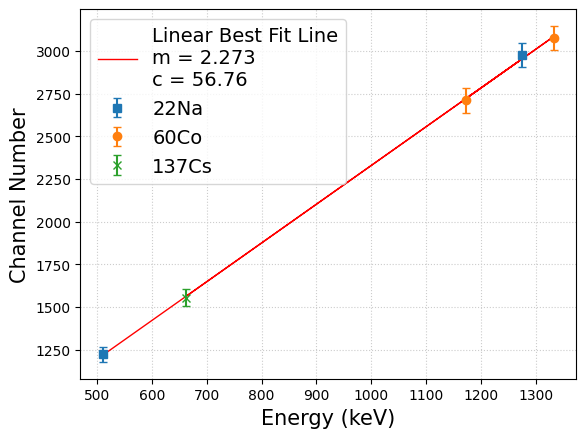

In [8]:
plt.figure()
# plt.scatter(energies, mus)
plt.xlabel('Energy (keV)', fontsize=15)
plt.ylabel('Channel Number', fontsize=15)
plt.xticks([500,600,700,800,900,1000,1100,1200,1300])
plt.grid(color='#CCCCCC', linestyle=':')
# plt.plot(energies, popt[0]*energies + popt[1], color='orange')
plt.plot(energies, popt[0]*energies + popt[1], 'red', linewidth=1, label=f'Linear Best Fit Line\nm = {popt[0]:.4}\nc = {popt[1]:.4}')
plt.errorbar(energies[:2], mus[:2], sigmas[:2], label='22Na', fmt='s', capsize=3)
plt.errorbar(energies[2:4], mus[2:4], sigmas[2:4], label='60Co', fmt='o', capsize=3)
plt.errorbar(energies[4:], mus[4:], sigmas[4:], label='137Cs', fmt='x', capsize=3)
plt.legend(fontsize=14)



plt.savefig('../../Report/Plots/low_calibration.pdf')



Fit: 62
Mu: 2711.739989376562
Sigma: 72.67858300399595
Amplitude: 233.51307806603205
Chi Squared per dof: 0.00303595706657607

Fit: 63
Mu: 3075.9279002943786
Sigma: 71.4046910618864
Amplitude: 182.5825050675984
Chi Squared per dof: 0.0005480884368201248

